In [1]:
"""Heatmap."""

import matplotlib.pyplot as plt
from scipy.sparse import load_npz
import pandas as pd
import numpy as np
import cv2
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter
import PIL
from PIL import Image

PIL.Image.MAX_IMAGE_PIXELS = 700000000

In [2]:
image_path = '/home/tom/github/niceview/db/data/gt-iz-p9-rep2-wsi-img.tiff'
cell_gene_path = '/home/tom/github/niceview/db/data/gt-iz-p9-rep2-cell-gene.npz'
cell_info_path = '/home/tom/github/niceview/db/data/gt-iz-p9-rep2-cell-info.csv'

In [3]:
image = Image.open(image_path)
ymax, xmax = image.size

In [4]:
coords = pd.read_csv(cell_info_path)[['x', 'y']].values
color = load_npz(cell_gene_path).tocsc()[:, 0].toarray().flatten()

In [5]:
ys = np.round(coords[:, 1]).astype(int)
xs = np.round(coords[:, 0]).astype(int)
zs = color

In [6]:
xnew = np.linspace(xs.min(), xs.max(), 500)
ynew = np.linspace(ys.min(), ys.max(), 500)
xmesh, ymesh = np.meshgrid(xnew, ynew)
zmesh = griddata((xs, ys), zs, (xmesh, ymesh), method='linear', rescale=True)
smoothed_matrix = gaussian_filter(zmesh, 1)

(9843.0, 0.0)

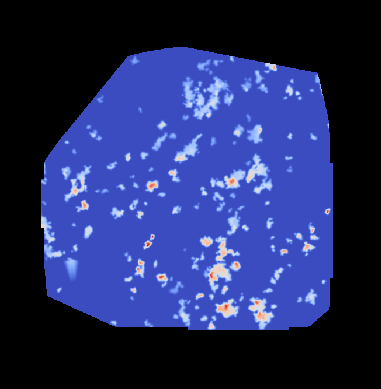

In [7]:
fig, ax = plt.subplots()
fig.set_facecolor('black')
ax.pcolormesh(xmesh, ymesh, smoothed_matrix, alpha=1, cmap='coolwarm')
ax.set_facecolor('black')
ax.set_aspect('equal')
ax.axis('off')
ax.set_xlim(0, xmax)
ax.set_ylim(ymax, 0)

In [8]:
fig.savefig('heatmap.png', dpi=2500, bbox_inches='tight', pad_inches=0)
heatmap = cv2.imread('heatmap.png')
resized = cv2.resize(heatmap, (xmax, ymax), interpolation = cv2.INTER_AREA)
cv2.imwrite('heatmap.png', resized)

True